In [1]:
import numpy as np
from numpy.random import default_rng

The aim of this notebook is to replicate fixations through our model. We will use our model but confine it to the 'active search' / fixation phase:
$$ x(t+dt) = x(t) + \xi_x \cdot \sqrt{D_s \cdot dt} $$
$$ y(t+dt) = y(t) + \xi_y \cdot \sqrt{D_s \cdot dt} $$

$ D_s $ is the diffusion coefficient for the local search / fixation.


In [22]:
D_s = 1
v_s = 0
rng = default_rng()

def generate_fixation(duration, x_start = 0.5, y_start = 0.5, dt = 10 ** (-1), time_start = 0):
    """
    Generates a dict with timestamps and related coordinates
    params:
        duration: Duration of the fixation in ms
        x_start: Start x-value, [0, 1]
        y_start: Start y-value, [0, 1]
        dt: Delta-t in ms
        time_start: Start time in ms
    """
    x_prev = x_start
    y_prev = y_start
    time_crt = time_start
    positions = {
        'time': [time_start],
        'x': [x_start],
        'y': [y_start]
    }
    for i in range(int(duration // dt)):
        time_crt += dt
        (x, y) = next_pos(x_prev, y_prev, dt, v = v_s, D = D_s)
        positions['time'].append(time_crt)
        positions['x'].append(x)
        positions['y'].append(y)
        
        x_prev = x
        y_prev = y
    
    return positions

def next_pos(x_prev, y_prev, dt, v, D):
    x = eq_x(x_prev, dt, v, D)
    y = eq_y(y_prev, dt, v, D)
    return x, y

    
def eq_x(x_prev, dt, v, D):
    phi = rng.random()*2*np.pi
    xi_x = rng.normal()
    return  x_prev + v*dt*np.cos(phi) + xi_x*np.sqrt(D*dt)

def eq_y(y_prev, dt, v, D):
    phi = rng.random()*2*np.pi
    xi_y = rng.normal()
    return y_prev + v*dt*np.sin(phi) + xi_y*np.sqrt(D*dt)

We draw the duration from an exponential distribution. See the fixation_analysis notebook for background on the specific distribution parameters.

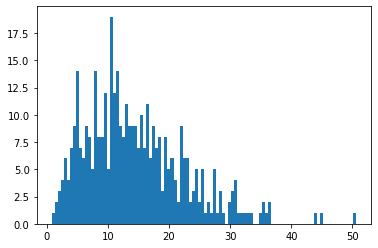

In [28]:
from matplotlib import pyplot as plt

distances = []
for i in range(400):
    duration = int(rng.exponential(80) + 60)
    fixation = generate_fixation(duration)

    x_0 = fixation['x'][0]
    y_0 = fixation['y'][0]
    x_n = fixation['x'][-1]
    y_n = fixation['y'][-1]
    
    distances.append(np.sqrt((x_n - x_0) ** 2 + (y_n - y_0) ** 2))

plt.hist(distances, bins=100)
plt.show()